In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [14]:
dataset = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = dataset.load_data()



3


(60000, 28, 28)

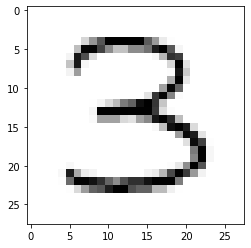

In [15]:
image_index = 7778 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
x_train.shape

In [16]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255



In [20]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2066 - accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0798 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0553 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0421 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0342 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0240 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0209 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0739 - accuracy: 0.9835


[0.07389009743928909, 0.9835000038146973]

6


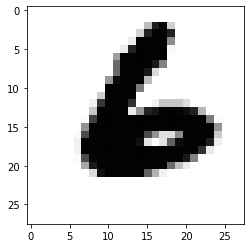

In [31]:
image_index = 7778 # You may select anything up to 60,000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
y_pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(y_pred.argmax())